---
>> **2. UŽDUOTIS**
>>
>> [Airbnb duomenys](http://insideairbnb.com/get-the-data.html)
>>
>> Atsisiųskite vieną iš miestų ir atsakykite į klausimus
>>
>> 1. Top 10 savininkų (daugiausiai nuomoja, uždirba)
>> 2. Kaip dienos kaina kinta jeigu nuomojamasi savaitei/mėnesiui/dienai (listings)
>> 3. Kaip kaina priklauso nuo vietos mieste įvertinimo? Švaros? ir t.t
>> 4. Rasti savininkus įvardintus kaip 'superhosts'. Kokią dalį visų
nuomotojų jie sudaro?
>> 5. Ilgiausias komentaras (reviews_details)
>> 6. Daugiausiai komentarų turinti vieta
>> 7. Iš komentarų datų (reviews) suraskite kada daugiausiai turistų mieste (plot comments vs dates)
>> 8. Savo klausimą
>> 9. Savo klausimą
>> 10. Savo klausimą
>>
>> Portafolio kūrimas.
>>
>> - Patalpinkite kodą į savo github ar gitlab paskyrą (+1 tšk prie kolio)
>>
---

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
listings = pd.read_csv(
    "../exam/K2/airbnb/listings.csv", index_col="id")
listings_details = pd.read_csv(
    "../exam/K2/airbnb/listings.csv.gz",
    index_col="id",
    low_memory=False,
)
calendar = pd.read_csv(
    "../exam/K2/airbnb/calendar.csv.gz",
    parse_dates=["date"],
    index_col=["listing_id"],
)
reviews = pd.read_csv(
    "../exam/K2/airbnb/reviews.csv",
    parse_dates=["date"],
    index_col=["listing_id"],
)
reviews_details = pd.read_csv(
    "../exam/K2/airbnb/reviews.csv.gz",
    parse_dates=["date"],
    index_col=["listing_id"],
)

In [37]:

top10Id = (
    listings.groupby(["host_id"])["host_name"]
    .count()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
    .head(10)
)


In [38]:
print(top10Id)

        host_id  count
3374   26497220    207
6341  104309976    196
6391  107378253    186
6729  124060715    147
8396  263502162    145
6438  109638288    120
6394  107434423     95
9618  425429222     84
1761    8167447     78
3988   35817561     74


In [39]:
for t_id in top10Id["host_id"].to_numpy():
    print(listings.loc[listings["host_id"] == t_id].iloc[1, 2])

Vacasa Texas
WanderJaunt
Hill Country Premier Lodging
Evolve
Landing
Vacasa Texas
Blueground
Karin
Martin
Jen And Steven


In [40]:
top100Id = (
    listings.groupby(["host_id"])["host_name"]
    .count()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
    .head(100)
)
top100Id.head()

host_id  count
3374   26497220    207
6341  104309976    196
6391  107378253    186
6729  124060715    147
8396  263502162    145

In [41]:
cummulative_sum = (
    listings[listings["host_id"].isin(top100Id["host_id"])]
    .groupby("host_id")["price"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
cummulative_sum.head()

host_id
104309976    1949952
210733801     213912
118565935      81733
26497220       65571
109638288      42925
Name: price, dtype: int64

In [42]:
for c_id, c_sum in zip(cummulative_sum.index.to_numpy(), cummulative_sum.to_numpy()):
    print(
        f'{listings.loc[listings["host_id"] == c_id].iloc[1, 2]} earns {c_sum}')

WanderJaunt earns 1949952
Above Vacation earns 213912
Renters Club earns 81733
Vacasa Texas earns 65571
Vacasa Texas earns 42925
Hill Country Premier Lodging earns 35342
Evolve earns 34664
Tracey earns 30516
ITrip Vacations earns 28464
Horseshoe Bay Living earns 24107


In [43]:
def kainos_kitimas(dienos):
    price=0
    n=0
    for x in range(len(listings)):
        #print(listings['minimum_nights'][x])\
        if listings.minimum_nights.iloc[x]==dienos:
            price=price+listings.price.iloc[x]
            n=n+1
        #print(listings.host_id.iloc[x])
    average=price/n/dienos
    return average

In [44]:
kainos_kitimas(7)

29.667254556143444

In [45]:
kainos_kitimas(30)

5.309066859066859

In [46]:
kainos_kitimas(1)

571.5576434738446

In [47]:
listings.head()


name    host_id  \
id                                                                       
319887                     Quaint East Austin 2BR SXSW 2016    1640158   
319894                       The Perfect Austin Modern Home    1640172   
46856014  Electric Fireplace+Fire Pit, Lake Fishing + ka...  375760981   
5456              Walk to 6th, Rainey St and Convention Ctr       8028   
321675                    3/2 House w/ Pool in Barton Hills    1142525   

         host_name  neighbourhood_group  neighbourhood  latitude  longitude  \
id                                                                            
319887      Jeremy                  NaN          78702  30.25328  -97.72968   
319894        Gary                  NaN          78724  30.28354  -97.64966   
46856014      Niza                  NaN          78611  30.80862  -98.37400   
5456        Sylvia                  NaN          78702  30.26057  -97.73441   
321675       James                  NaN          78704  30.25104  -97.78973   

                room_type  price  minimum_nights  number_of_reviews  \
id                                                                    
319887    Entire home/apt    694               4                  2   
319894    Entire home/apt    192               2                171   
46856014  Entire home/apt    194               2                 88   
5456      Entire home/apt    140               2                614   
321675    Entire home/apt    500               1                 13   

         last_review  reviews_per_month  calculated_host_listings_count  \
id                                                                        
319887    2015-03-18               0.02                               1   
319894    2022-09-11               1.34                               2   
46856014  2022-08-28               4.17                               1   
5456      2022-08-28               3.73                               1   
321675    2015-10-04               0.11                               1   

          availability_365  number_of_reviews_ltm  license  
id                                                          
319887                   0                      0      NaN  
319894                 156                     36      NaN  
46856014               342                     47      NaN  
5456                   311                     43      NaN  
321675                   0                      0      NaN

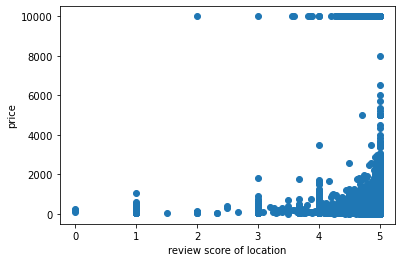

In [48]:
plt.scatter(listings_details.review_scores_location, listings_details.price)
plt.xlabel("review score of location")
plt.ylabel("price")
plt.show()

In [49]:
listings.price.head()

id
319887      694
319894      192
46856014    194
5456        140
321675      500
Name: price, dtype: int64

In [50]:
listings_details["price"] = pd.to_numeric(
    listings_details["price"].str.strip("$").str.replace(",", "")
)
listings_details.price.head()

id
5456        140.0
5769         41.0
46856014    194.0
319887      694.0
319894      192.0
Name: price, dtype: float64

In [51]:
listings_details.groupby("review_scores_location").price.mean()

review_scores_location
0.00     176.666667
1.00     228.652174
1.50      40.000000
2.00    1183.777778
2.33      58.000000
           ...     
4.96     253.809896
4.97     276.082386
4.98     259.767857
4.99     266.296296
5.00     336.049577
Name: price, Length: 134, dtype: float64

<AxesSubplot:title={'center':'price'}, xlabel='review_scores_location'>

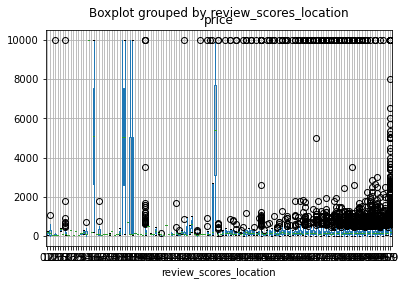

In [59]:
listings_details.boxplot(column="price", by="review_scores_location")

<AxesSubplot:title={'center':'price'}, xlabel='review_scores_cleanliness'>

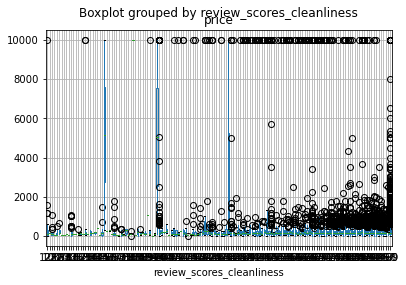

In [ ]:
listings_details.boxplot(column="price", by="review_scores_cleanliness")

In [ ]:
listings_details.host_is_superhost.isnull().sum()

4

In [ ]:
total = listings_details.host_is_superhost.shape[0]
total

18337

In [25]:
superhosts = listings_details.host_is_superhost.str.count(r"t").sum()
superhosts

6781.0

In [26]:
print(f" Super hosts are {superhosts/total*100:.3}% of all the landlords")

 Super hosts are 37.0% of all the landlords


In [32]:
reviews_details.comments.str.len().sort_values(ascending=False).head()

listing_id
21026388    5871.0
20171877    5710.0
37286070    5632.0
51844364    5579.0
37201813    5514.0
Name: comments, dtype: float64

In [33]:
for review in reviews_details.loc[21026388].comments:
    print(len(review))

30
213
99
860
312
260
87
378
241
434
30
19
255
680
113
622
68
129
13
12
338
18
30
307
232
162
165
200
445
155
260
350
73
346
158
87
98
173
380
137
37
129
42
39
176
105
217
216
584
795
65
79
199
55
299
254
338
329
400
196
119
57
622
82
454
418
365
186
201
301
144
308
88
32
43
353
315
166
349
55
26
1182
244
27
114
565
29
74
196
311
219
128
73
177
261
37
282
369
82
157
63
31
65
74
48
248
275
13
107
46
101
224
261
258
255
188
893
19
302
120
308
626
107
204
65
57
122
265
139
272
148
535
207
287
54
75
52
270
39
89
378
90
133
247
11
31
180
165
157
20
157
143
866
242
98
31
230
75
67
118
183
30
282
36
254
517
93
150
436
82
93
231
11
60
98
55
68
260
339
225
152
2186
88
190
201
106
71
283
198
105
84
553
80
236
233
31
178
283
71
152
150
363
232
473
61
93
31
80
38
11
215
310
109
286
160
156
82
101
348
115
41
70
59
131
298
1519
11
917
72
50
78
158
444
616
15
39
136
193
45
560
165
252
86
801
106
345
127
169
79
144
205
131
48
79
48
49
62
165
176
21
197
352
119
355
97
196
88
61
358
30
186
154
36
131
10

In [36]:
reviews_details.loc[21026388].set_index("id")["comments"].str.len().sort_values(ascending=False)

id
441280236703145400    5871
444931808             2186
603040075             1865
523016400             1519
286555572             1182
                      ... 
494113410               11
363843026               11
523846944               11
429657626               11
599293410               10
Name: comments, Length: 547, dtype: int64

In [37]:
reviews_details.groupby("listing_id")["id"].count(
).sort_values(ascending=False).head(1)

listing_id
949922    1062
Name: id, dtype: int64

In [38]:
reviews_details.loc[949922]

id       date  reviewer_id reviewer_name  \
listing_id                                                             
949922                 3642693 2013-02-26      5163810        Hannah   
949922                 3643062 2013-02-26      3965768        Andrew   
949922                 3732042 2013-03-09      5241802          Drew   
949922                 3757624 2013-03-11        46024       Santosh   
949922                 3776592 2013-03-13      4051173          Jill   
...                        ...        ...          ...           ...   
949922      691300169501571943 2022-08-11    243724801      Patricia   
949922      691988031185901837 2022-08-12    471758634      Danielle   
949922      693480268795069882 2022-08-14    339721484          Andy   
949922      698542954618421172 2022-08-21    243571447        Karina   
949922      700746785400388673 2022-08-24    459708308       Matthew   

                                                     comments  
listing_id                                                     
949922      We had a great experience staying in Marcy's a...  
949922      I enjoyed my stay in the Airstream, which is c...  
949922      Marcella's airstream was absolutely fantastic....  
949922      I loved it.  The airstream, itself, is very co...  
949922      Marcella's little silver airstream was lovely!...  
...                                                       ...  
949922      Must stay! If you love animals, swings, and fa...  
949922      This was our first airbnb stay; we usually use...  
949922      We had a great time at Marcella's BnB. The ani...  
949922      One of the best places to stay while in Austin...  
949922                                  Exactly what I needed  

[1062 rows x 5 columns]

In [39]:
reviews["count"] = 1
reviews

date  count
listing_id                          
5456               2009-03-08      1
46856014           2020-12-19      1
46856014           2020-12-30      1
46856014           2021-01-17      1
46856014           2021-02-02      1
...                       ...    ...
51927594           2022-06-26      1
51927594           2022-07-04      1
51927594           2022-08-01      1
692290837388019951 2022-08-27      1
692290837388019951 2022-09-04      1

[649234 rows x 2 columns]

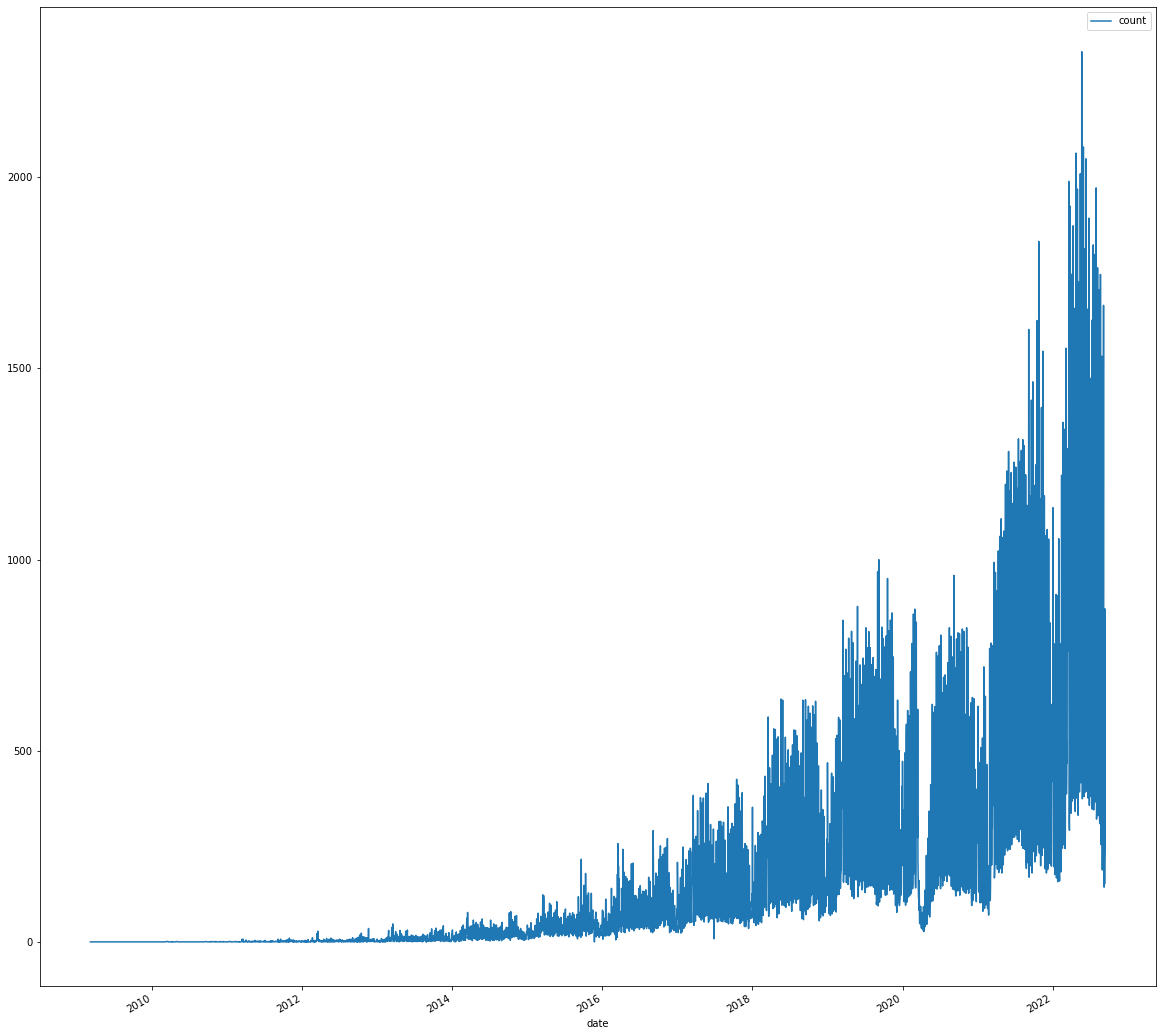

In [40]:
reviews.groupby("date").sum().plot(figsize=(20, 20));

In [ ]:
# Kaip išsidėstę skelbimai žemėlapyje?

Object `žemėlapyje` not found.


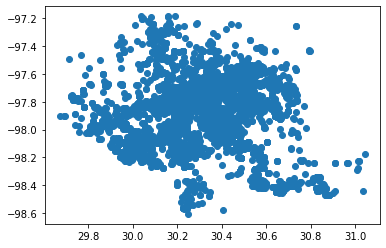

In [45]:
lats = listings["latitude"].tolist()
lons = listings["longitude"].tolist()
locations = list(zip(lats, lons))
plt.scatter(lats, lons);

In [27]:
# Dažniausi kambarių tipai

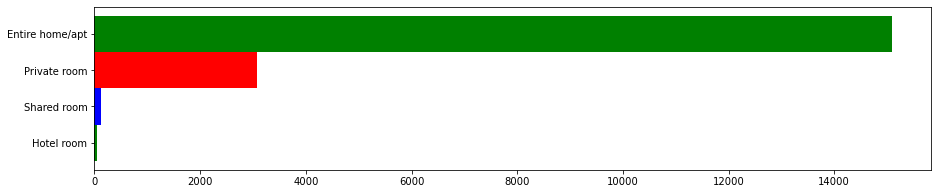

In [25]:
listings["room_type"].value_counts().sort_values(ascending=True).plot.barh(
    figsize=(15, 3), width=1, color=["g", "b", "r"]
);

In [ ]:
# Kiek ir kokio tipo būstų yra nuomojama?

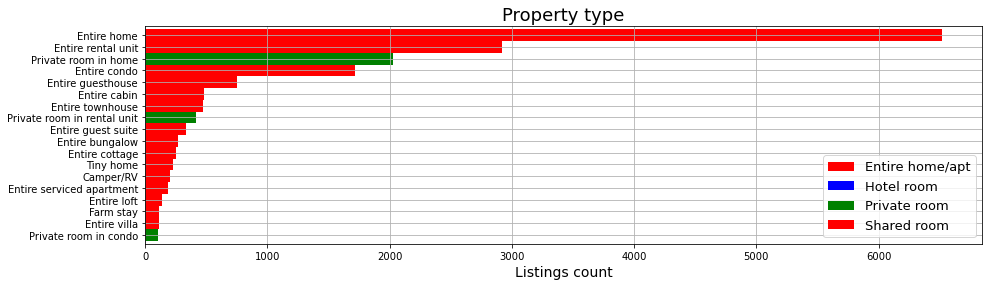

In [29]:
prop = listings_details.groupby(["property_type", "room_type"]).room_type.count()
prop = prop.unstack()
prop["total"] = prop.iloc[:, 0:3].sum(axis=1)
prop = prop.sort_values(by=["total"])
prop = prop[prop["total"] >= 100]
prop = prop.drop(columns=["total"])
prop.plot(
    kind="barh",
    stacked=True,
    color=["r", "b", "g"],
    linewidth=1,
    grid=True,
    figsize=(15, 4),
    width=1,
)
plt.title("Property type", fontsize=18)
plt.xlabel("Listings count", fontsize=14)
plt.ylabel("")
plt.legend(loc=4, prop={"size": 13});

In [30]:
# aš nelabai supratau ar galima naglai imti viską iš atsakymų, bet kai jie egzistuoja labai sunku daryt kitaip 